In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Data

In [2]:
try:
   import cPickle as pickle
except ImportError:
   import pickle
from data import load_poem, make_paragraph, make_vocab, poem_to_tensor

In [ ]:
poems = load_poem(author='李白', constraint=5)
poems = make_paragraph(poems)
vocab, vocab_size = make_vocab(poems)
print("poems size: %d, vocab size: %d" % (len(poems), vocab_size))

In [ ]:
# save poems and vocab
poems_name = "李白_5.poems"
vocab_name = "李白_5.vocab"

with open(poems_name, 'wb') as f:
    pickle.dump(poems, f)
    
with open(vocab_name, 'wb') as f:
    pickle.dump(vocab, f)

In [3]:
# load poems and vocab
poems_name = "李白_5.poems"
vocab_name = "李白_5.vocab"

with open(poems_name, 'rb') as f:
    poems = pickle.load(f)
    
with open(vocab_name, 'rb') as f:
    vocab = pickle.load(f)

vocab_size = len(vocab)

In [4]:
print('\n'.join(poems[:5]))

三十六離宮，樓臺與天通。閣道步行月，美人愁煙空。恩疎寵不及，桃李傷春風。淫樂意何極，金輿向回中。萬乘出黃道，千旗揚彩虹。前軍細柳北，後騎甘泉東。豈問渭川老，寧邀襄野童。秋暮瑤池宴，歸來樂未窮。
垂楊拂綠水，搖豔東風年。花明玉關雪，葉暖金窗煙。美人結長恨，相對心悽然。攀條折春色，遠寄龍庭前。
明月出天山，蒼茫雲海間。長風幾萬里，吹度玉門關。漢下白登道，胡窺青海灣。由來征戰地，不見有人還。戍客望邊色，思歸多苦顏。高樓當此夜，歎息未應閑。
趙客縵胡纓，吳鉤霜雪明。銀鞍照白馬，颯沓如流星。十步殺一人，千里不留行。事了拂衣去，深藏身與名。閑過信陵飲，脫劒膝前橫。將炙啖朱亥，持觴勸侯嬴。三盃吐然諾，五嶽倒爲輕。眼花耳熱後，意氣素霓生。救趙揮金槌，邯鄲先震驚。千秋二壯士，烜赫大梁城。縱死俠骨香，不慙世上英。誰能書閤下，白首太玄經。
明月出天山，蒼茫雲海間。長風幾萬里，吹度玉門關。漢下白登道，胡窺青海灣。由來征戰地，不見有人還。戍客望邊色，思歸多苦顏。高樓當此夜，歎息未應閑。


## High freq words cut

In [5]:
from data import high_freq_word_cut

count = high_freq_word_cut(poems)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.163 seconds.
Prefix dict has been built succesfully.


In [6]:
# save count
count_name = "李白_5.count"

with open(count_name, 'wb') as f:
    pickle.dump(count, f)

In [7]:
# load count
count_name = "李白_5.count"

with open(count_name, 'rb') as f:
    count = pickle.load(f)
    
print(count)

{'離宮': 3, '樓': 20, '閣': 13, '步行': 2, '人': 194, '煙空': 1, '恩': 13, '桃李': 33, '傷春': 2, '風': 103, '意何': 2, '輿向': 2, '黃道': 2, '彩虹': 5, '前軍': 2, '細柳': 2, '後': 50, '甘泉': 5, '渭川': 3, '老': 4, '寧邀襄': 2, '野童': 2, '池': 9, '宴': 9, '楊拂綠': 2, '水': 85, '花明玉': 2, '關雪': 2, '葉暖金': 1, '窗煙': 1, '相對心': 1, '條折': 2, '春色': 9, '遠寄龍': 2, '天山': 6, '海間': 2, '長風': 3, '吹度': 2, '玉門': 2, '關': 9, '胡': 23, '青海': 2, '地': 4, '客': 57, '邊色': 2, '高樓': 3, '趙': 10, '纓': 10, '吳': 19, '鉤': 9, '霜雪': 5, '銀鞍照': 2, '白馬': 6, '流星': 8, '事': 38, '拂衣': 12, '深藏身': 2, '名': 8, '信': 11, '陵': 9, '膝': 3, '朱亥': 2, '侯嬴': 3, '眼花': 2, '耳': 6, '意氣素': 2, '霓生': 2, '趙揮': 2, '金槌': 3, '邯鄲': 11, '千秋': 7, '壯士': 12, '大梁': 4, '城': 20, '縱死俠': 2, '骨香': 2, '能書': 1, '白首': 6, '太玄': 2, '經': 7, '昭君': 2, '玉': 54, '鞍': 5, '上馬': 3, '紅頰': 2, '漢宮': 4, '地妾': 2, '紅塵': 2, '黃金鞭': 2, '楊': 8, '君家': 4, '阿那': 2, '紫燕': 2, '黃金': 16, '瞳': 3, '結客': 2, '洛門東': 2, '凌轢': 2, '珠袍': 2, '曳錦': 2, '匕首': 3, '吳鴻': 2, '萬夫勇': 2, '劇': 11, '新豐': 4, '杯酒': 9, '都市': 3, '易水寒': 2, '令日': 2, '貫': 3, '虹'

In [8]:
from data import make_sub_topics

sub_topics = make_sub_topics(count, poems)
    
print(sub_topics)

[[ 1.  1.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [9]:
from data import make_PCA_reduction

reduced_sub_topics, pca = make_PCA_reduction(sub_topics, 256)

In [10]:
# save sub_topcs and pca
reduced_sub_topics_name = "李白_5.topics"

pca_name = "李白_5.pca"

with open(reduced_sub_topics_name, 'wb') as f:
    pickle.dump(reduced_sub_topics, f)
    
with open(pca_name, 'wb') as f:
    pickle.dump(pca, f)

In [11]:
# load sub_topcs and pca
reduced_sub_topics_name = "李白_5.topics"

pca_name = "李白_5.pca"

with open(reduced_sub_topics_name, 'rb') as f:
    reduced_sub_topics = pickle.load(f)
    
with open(pca_name, 'rb') as f:
    pca = pickle.load(f)  

print(reduced_sub_topics.shape)
print(pca)

(835, 256)
PCA(copy=True, iterated_power='auto', n_components=256, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


## Train

In [12]:
from model import RNN
from solver import Solver

model = RNN(vocab_size, 256, 256)
solver = Solver(model, poems, vocab,
                sub_topics=reduced_sub_topics,
                count = count,
                pca=pca,
                num_epochs=10000, 
                learning_rate=1e-3, 
                save_every = 1000,
                print_every=100, 
                plot_every=10, 
                verbose=True)

In [13]:
solver.train()

 24s, 1%, 6.5563]
牀前看月光，，不倚一，崃驱成歌歌幸。发风。，，。我
 45s, 2%, 5.7045]
牀前看月光，骋求敝有託。飞丈塞我，秀稀目桃手。还上看清山，牛列在绵。飞。开不暮金。，佩千到目复。遗落观发轻，激奏猨浣川。臣，楼风戏颜知。奔笑金鼓里。负碧物万合，酒犬鷴我过。东二孤，风挟甚怀猨。，胡乐寡客。山下。左欲缄卷啸，
 4s, 3%, 5.8749]
牀前看月光，歌落信游登。丝云起陇苍，作欢隐明如。
 25s, 4%, 5.1601]
牀前看月光，时松子吴晓。
 44s, 5%, 5.2138]
牀前看月光，几日造江灭。
 6s, 6%, 4.9281]
牀前看月光，摇黄京一鼓。一海豫梅妇，荣湘託不间。丹桂名来客，照出风天宫。
 27s, 7%, 5.3652]
牀前看月光，离心汉本听。东归花李时，含
 49s, 8%, 5.9092]
牀前看月光，汉爲卧章里。
 9s, 9%, 5.7335]
牀前看月光，思尔安中流，莫宝几云度。水花门若鸟，一阵上连期。行赠罗南曩，风澜爲牖芬。
 30s, 10%, 4.8572]
牀前看月光，里鞍秋庐花。
 53s, 11%, 5.3151]
牀前看月光，共地蚕金术。百知明弦鸟，马列凌堂年。
 13s, 12%, 5.8429]
牀前看月光，郑与苦去舌。无垣上长水，岳苑向云屏。却居送云幽，相入江山羽。交君云下夫，烜道速不回。如帘使宜石，风日岳鬓诏。
 32s, 13%, 5.0063]
牀前看月光，舟忽鸡洲齐。
 56s, 14%, 5.7121]
牀前看月光，君拂死沙雪。应才笑洲居，落门河天目。
 21s, 15%, 5.5895]
牀前看月光，山笑飞天云。开愁舞燕历，梧自酒临离。此吟满白山，念登落清来。
 41s, 16%, 5.4332]
牀前看月光，飘庭生芳蒲。清退五云碧，集猨之月迈。
 3s, 17%, 5.2644]
牀前看月光，时坐不风明。
 26s, 18%, 5.3865]
牀前看月光，巖事牛阳适。举去不门云，结不鲁暖断。
 48s, 19%, 5.9911]
牀前看月光，不花长元荣。落月望长上，吾水紫岘清。洒陪壁下劒，思将剪所待。
 7s, 20%, 4.5283]
牀前看月光，将下非天连。我是昔乐言，肠城析爲猨。君杨连安秀，飞明色无乐。露行至运霭，鸟入不彩砂。一风无庙微，水吹清绝

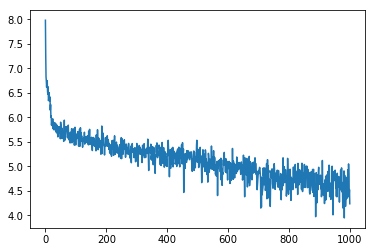

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(solver.all_losses)

In [15]:
predicted = solver.evaluate(start_with='牀前看月光')
print("length: %d, %s" % (len(predicted), predicted))

length: 60, 牀前看月光，水行凌郭讴。花风长玉关，立窥未可游。一作咄虎里，口爲埽悲鸣。音物不成子，周事爲何系。亚及窥金国，脱蹇佐金蹰。


In [16]:
solver.train()

 22s, 1%, 4.9401]
牀前看月光，三流见舟生。乱雁费云镜，义知五云云。歌尔三汉液，左怅挂荆晖。一来入越泉，清荣渡紫庭。此客酒家子，大精遂所言。妾事不可云，饮席挂高浅。云沙摘三马，师意经龙才。鞍云令月异，窈玲输枯伦。终心移不央，不可应相飘。
 43s, 2%, 4.9949]
牀前看月光，开景起傲还。扬垂天巴去，突动恋金梧。绿山望幽云，不是明主客。笑将不有时，爲我亦不息。人意可不醉，同与去还看。故日不堕胡，由来尖之凄。多君松草来，时了空鸾笑。千公布劒食，西激空泥身。愿欣达秀余，连区即沦兵。齐虏东草间，再知天儿暖。唿学多沦合，鲁斗再邈雪。逢君在英国，佳风隔旧意。云峦爱相醉，一梦生中扬。投德落万里，兹识书相伤。
 6s, 3%, 5.0365]
牀前看月光，月日摇虎衣。天明无踪乐，三帆断龙池。千国伤中月，岂与闲迷功。相思非不见，含我自难定。
 25s, 4%, 4.8741]
牀前看月光，月日邯萋桑。衣迢若不见，自此心谁然。
 45s, 5%, 4.3227]
牀前看月光，门临大百飞。五波如未散，万龙皆秋梅。空舒八雪水，汉女合何臣。所从楚草来，复妾平野年。行去望沧山，白水怀愁歌。
 8s, 6%, 4.8148]
牀前看月光，花南夜之屏。却难长英客，安得轻济书。
 28s, 7%, 4.5614]
牀前看月光，兵鞍事襄雪。
 48s, 8%, 3.9862]
牀前看月光，夜绿笑人归。坐飞回日月，红溪秋月月。空者千下去，弄想送人飞。
 9s, 9%, 5.4444]
牀前看月光，月度飞飞觞。感君人我人，客迹逐罗鬓。怀去不不见，地拂太化鸿。
 30s, 10%, 4.4103]
牀前看月光，蒲头照兔枝。白马一白发，绿地无我人。不知不忍意，临雄不相攀。吾投长高门，秋色？诸阳。未以二陵酒，岁酒无时平。因思太间乐，还吟征衰真。举钟不不见，顾此两远如。
 51s, 11%, 4.6691]
牀前看月光，月上千庭情。青行五凤待，一啼日载开。何惜一所见，白藏可长老。朱啸能党去，荣字已与时。
 10s, 12%, 3.8616]
牀前看月光，一门心衰筵。客友金陵道，地有携琼真。丑节过白鹿，平井无荒禁。夜往寒风中，乃见恋根人。时非衰菲郎，清篱隐声枝。桃风虽有归，新树碧玉牀。
 32s, 13%, 5.1822]
牀前看月光，川阳笑先来。长飞海上归，空若天地天。香云无顾字，天俗对

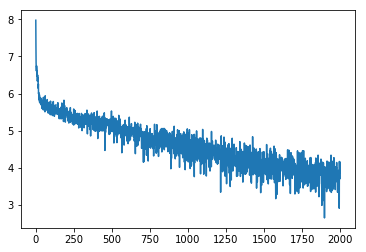

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(solver.all_losses)

In [20]:
predicted = solver.evaluate(start_with='牀前看月光', temperature=0.2)
print("length: %d, %s" % (len(predicted), predicted))

length: 24, 牀前看月光，朝明征虏雪。山花娇欲语，流水似寒烟。


In [21]:
solver.num_epochs = 30000
solver.learning_rate = 1e-4
for param_group in solver.optim.param_groups:
    param_group['lr'] = solver.learning_rate

In [22]:
solver.train()

 22s, 0%, 3.8452]
牀前看月光，萧溪引新寒。宫花湖落月，一夜绿云飞。
 46s, 0%, 2.3942]
牀前看月光，当夜有人欢。中闻青牛落，不得一相悠。遥看飞归好，遥啸夜云鸣。四流得洒姬，含后卧云川。畴与妾生就，但恐凤嚣读。
 9s, 1%, 3.6191]
牀前看月光，未向若何时。遥看若未尽，丝烛行清辉。晚来不相见，白日在虚荣。
 32s, 1%, 2.5560]
牀前看月光，云火一见人。
 56s, 1%, 4.3207]
牀前看月光，清叶荡何时。相看不若荡，长翠生相期。
 18s, 2%, 3.9391]
牀前看月光，三豪如成舟。云舟归千雪，荡漾难成身。
 37s, 2%, 3.1625]
牀前看月光，百陵来荷洲。秋花几欲满，参差坐迷秋。可得三野下，空揖钓阴羣。胡海拂海岳，露活延山堂。回木别海台，玉兴还素云。红花薄美道，思尔结楼霞。
 59s, 2%, 2.7640]
牀前看月光，幽窗拂无骨。听家凌绿玉，飘飖连飞波。归来入芳物，心若南城隅。人身不可见，各与凌杨山。
 27s, 3%, 4.7403]
牀前看月光，黄花有白头。素看剡路绿，月日几心还。
 50s, 3%, 4.0187]
牀前看月光，白水已飞烟。客看蓬草水，託着轻鸳鸯。我欲难及世，熊君复进龙。白马酒早生，林事道不在。登吁日寂久，荣出石古濆。一唱度海作，天飞落紫名。城意还不尽，往来鸟中悲。
 11s, 3%, 5.0829]
牀前看月光，上明胡白苹。蚕鞭若秦月，秋水明徂枝。玉卧生横户，汉日结鹤然。叠萝向一丈，直爲雪情开。云鞭日笑去，溪云宿碧越。佳人无秋兴，从之长飞鸿。
 33s, 4%, 1.9028]
牀前看月光，花夜艳青山。东花如绣颊，波归一战颜。夸开绝岁鸟，歌鸣无相思。
 54s, 4%, 3.1845]
牀前看月光，朝风伤地秋。孤闲倚河至，三足寄井蓬。风辞玉关上，深倾人上流。清云拂秋镜，白马挂凉光。
 15s, 4%, 1.9763]
牀前看月光，花明朝南寒。万重折叶夜，叶冷柳流卧。寒歌绿江上，曲度寒天流。此人自几心，不得携容歇。由来列天玉，灭酣江水流。问金紫成首，还如云月草。君君初此酒，三年儿能央。
 35s, 5%, 2.8117]
牀前看月光，爱此明月环。芜王玉花去，歌似日中迟。
 54s, 5%, 4.5630]
牀前看月光，鸣楼碧云端。金弓垂翠云，班餐入朱阙。可息

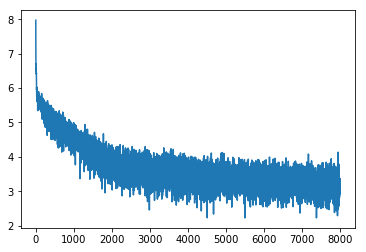

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(solver.all_losses)

In [24]:
predicted = solver.evaluate(start_with='牀前看月光', temperature=0.1)
print("length: %d, %s" % (len(predicted), predicted))

length: 36, 牀前看月光，歌歌远天涯。春风吹不尽，总是玉关情。何日平胡虏，良人罢远征。


In [25]:
solver.num_epochs = 20000
solver.learning_rate = 5e-5
for param_group in solver.optim.param_groups:
    param_group['lr'] = solver.learning_rate

In [26]:
solver.train()

 22s, 0%, 1.6367]
牀前看月光，不寄梦城时。此色三明人，倏来心琼色。怀天自不怨，去此越王家。
 42s, 1%, 4.7393]
牀前看月光，疑从步上时。目入未烛歌，荡荡不可期。
 3s, 1%, 1.8685]
牀前看月光，行明步声清。山花娇三月，荣鸟远人人。
 25s, 2%, 3.2317]
牀前看月光，望我长安归。绿鬓如相尽，醉酒发何情。长闻白日崃，会觉清西秋。思来未觉见，早泪湘水流。
 47s, 2%, 4.5488]
牀前看月光，鸣绿秋水长。宫花争渌水，花月使人迷。
 5s, 3%, 2.0703]
牀前看月光，疑是巖上山。手是故中人，巖头罢亦还。
 28s, 3%, 2.1401]
牀前看月光，扬昔无春声。此行乘春月，白日遥天流。今我一挥手，爲君悲小歇。相思楚白峯，酒乐江花新。
 51s, 4%, 3.1611]
牀前看月光，水出碧水边。天川白县道，青楼绿云端。笑游燕代子，结茅沙屏空。一罢根石去，悲歌日断催。坐将不可见，越去空凄然。
 14s, 4%, 2.9003]
牀前看月光，月登白猨门。自惊飞海水，相化辞归人。
 37s, 5%, 4.5084]
牀前看月光，难知远如归。山树娇欲醉，昔谢变天山。空生虽未醉，笑爲杯心同。犹如金门鸟，客下五西间。书作独怀道，抚索几日熟。谓交两海水，斩阙生素尘。穷珠我沦惑，玉物与归同。人居相忍语，归来任征琴。寄怜新中去，去日竹波枝。
 2s, 5%, 2.6374]
牀前看月光，不知云湖间。天马分玉尺，舞道开凤澜。却怜海云上，东花寒上流。正飞花树枝，更尽几时闲。
 21s, 6%, 4.2744]
牀前看月光，罗望海水来。天庭一片月，远可期罗衣。君行北窗愁，客在花里开。挥马不忍意，从之不凄杯。
 44s, 6%, 2.8391]
牀前看月光，客出白海间。东风吹笑日，日树红关人。今归风仙人，下爱月时去。思色昏垫宰，留此移金帏。
 7s, 7%, 2.7038]
牀前看月光，夜入秋浦流。佳年羞此苦，独有愁人知。寒莺闻碧花，明月窥金罍。明月两不知，愁来东此吹。
 31s, 7%, 2.7881]
牀前看月光，花月鸣征袍。素手抽针冷，那堪把剪刀。裁缝寄远道，云云凌我霜。明朝坐未去，更向无心还。
 52s, 8%, 1.3026]
牀前看月光，东风采萋葵。白妓语春月，秋舟生彩衣。遥出楚城去，怀人向西秦。西乡不可饮

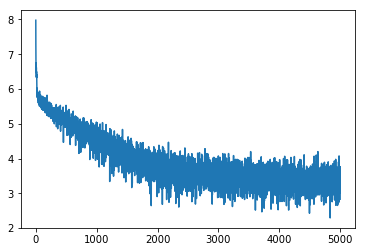

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(solver.all_losses)

In [45]:
predicted = solver.evaluate(start_with='牀前看月光', temperature=0.1, topics=["霜","月光","故鄉"])
print("length: %d, %s" % (len(predicted), predicted))

TypeError: evaluate() got an unexpected keyword argument 'topics'

In [31]:
# save solver
solver_losses_name = "李白_5.solver_losses"

with open(solver_losses_name, 'wb') as f:
    pickle.dump(solver.all_losses, f)

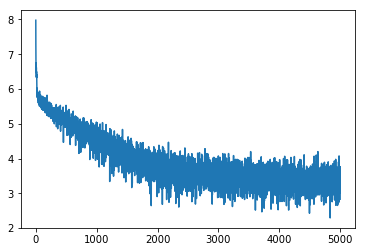

In [32]:
# load solver
solver_losses_name = "李白_5.solver_losses"

with open(solver_losses_name, 'rb') as f:
    all_losses = pickle.load(f)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

## Evaulate

In [77]:
from solver import Solver

import torch

model_name = "model/11-28_19-10/best_char_rnn.model"
model_load = torch.load(model_name)
solver = Solver(model, poems, vocab,
                sub_topics=reduced_sub_topics,
                count = count,
                pca=pca,
                num_epochs=10000, 
                learning_rate=1e-3, 
                save_every = 1000,
                print_every=100, 
                plot_every=10, 
                verbose=True)

In [78]:
predicted = solver.evaluate(start_with='牀前看月光', temperature=0.1, topics=["霜","月光","故鄉"])
print("length: %d, %s" % (len(predicted), predicted))

length: 36, 牀前看月光，疑是地上时。春风吹不尽，总是玉关情，归来一不见，独立一相逢。


In [75]:
print(solver.BLEU_score(predicted, "牀前看月光，疑是地上霜。舉頭望山月，低頭思故鄉。"))

0.1019074270320984
